In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sys 
sys.path.append("../../") 
from compare_algorithms.utils import create_dataset
%matplotlib notebook

In [2]:
filename = '../../data/week_data/data/California_summer_20120701-20120707新.csv'
x_train, y_train, x_test, y_test = create_dataset(filename,seq_len=9)

In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((711, 9), (711,), (288, 9), (288,))

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
# 网格化搜索寻找最优参数
svr = GridSearchCV(
    SVR(kernel="rbf", gamma=0.1,verbose=True),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
)

In [6]:
# svr = SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1, verbose=True)

In [7]:
svr.fit(x_train, y_train)

[LibSVM]*
optimization finished, #iter = 318
obj = -71.955237, rho = -11.459638
nSV = 273, nBSV = 263
[LibSVM]*
optimization finished, #iter = 408
obj = -78.551091, rho = -10.062823
nSV = 277, nBSV = 262
[LibSVM]*
optimization finished, #iter = 419
obj = -74.523626, rho = -9.690560
nSV = 261, nBSV = 250
[LibSVM]*
optimization finished, #iter = 456
obj = -92.017694, rho = -9.997923
nSV = 314, nBSV = 297
[LibSVM]*
optimization finished, #iter = 362
obj = -76.689356, rho = -10.034356
nSV = 296, nBSV = 279
[LibSVM]*
optimization finished, #iter = 618
obj = -58.329088, rho = -11.808310
nSV = 248, nBSV = 193
[LibSVM]*
optimization finished, #iter = 638
obj = -79.793752, rho = -10.777217
nSV = 238, nBSV = 184
[LibSVM]*
optimization finished, #iter = 515
obj = -70.305768, rho = -10.257116
nSV = 229, nBSV = 178
[LibSVM]*
optimization finished, #iter = 670
obj = -92.144114, rho = -10.834419
nSV = 277, nBSV = 220
[LibSVM]*
optimization finished, #iter = 584
obj = -77.808376, rho = -10.877144
nSV 

[LibSVM].......................................................*.......................................................................................*.........*
optimization finished, #iter = 150830
obj = -13156.122029, rho = -12.151377
nSV = 217, nBSV = 129
[LibSVM]...................................................*.....................................................................*..*
optimization finished, #iter = 121727
obj = -16991.426803, rho = -11.148468
nSV = 223, nBSV = 138
[LibSVM]..........................................................................*................................................................................*...............*
optimization finished, #iter = 168989
obj = -23291.681495, rho = -13.070759
nSV = 269, nBSV = 177
[LibSVM]...........................................................*.....................................................*.....*
optimization finished, #iter = 116687
obj = -17734.726315, rho = -13.391306
nSV = 225, nBSV = 149
[

GridSearchCV(estimator=SVR(gamma=0.1, verbose=True),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [8]:
svr_predict = svr.predict(x_test)

<IPython.core.display.Javascript object>


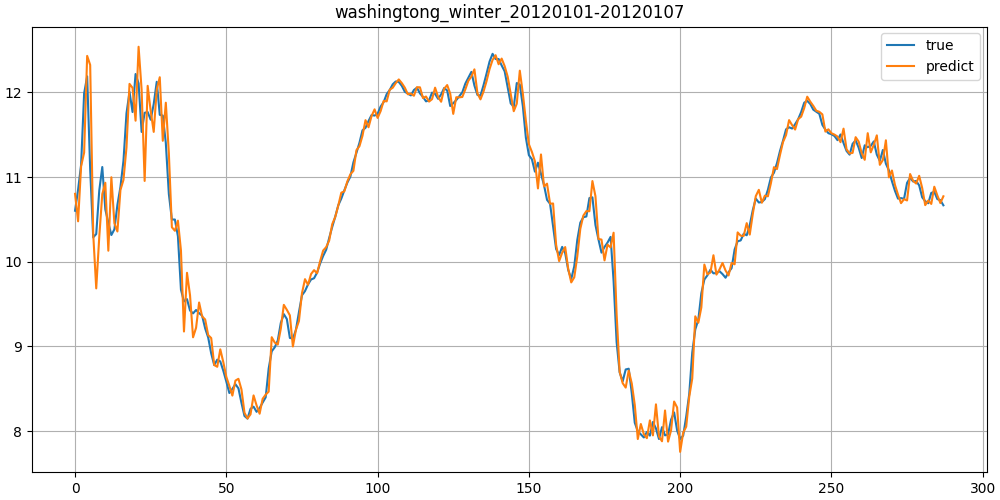

In [13]:
#  画出预测的图像，第二幅图为预测的图像，把缺失的数据补上
fig,ax = plt.subplots(figsize=(10, 5),layout='constrained')
ax.set_title("washingtong_winter_20120101-20120107")
ax.plot(y_test,label='true')
ax.plot(svr_predict,label='predict')
ax.grid()
ax.legend()
plt.show()

In [14]:
def cal_mse(y_hat, y):
    mse = (np.square(y_hat - y)).mean()
    return mse

In [15]:
mse = cal_mse(svr_predict, y_test)
mse

0.03632113951281443

In [16]:
df = pd.DataFrame(data={
                'true_value': y_test,
                'predict': svr_predict
            })
df.to_csv("result/California_summer_20120701-20120707.csv", index=False)